### KNN MNIST Digit Recognition System

In [137]:
# importing necessary libraries for the project
import pandas as pd # used to deal with tabled data
import numpy as np # used to deal with numbers
import matplotlib.pyplot as plt # used to visualize the data

In [138]:
dfx = pd.read_csv('xdata.csv')
dfy = pd.read_csv('ydata.csv')
dfy

0  0.0
0      1  0.0
1      2  0.0
2      3  0.0
3      4  0.0
4      5  0.0
..   ...  ...
394  395  1.0
395  396  1.0
396  397  1.0
397  398  1.0
398  399  1.0

[399 rows x 2 columns]

In [139]:
# converting the dataframes into array to work on it.
X = dfx.values
Y = dfy.values

In [140]:
X.shape

(399, 3)

In [141]:
Y.shape

(399, 2)

In [142]:
#removing the serial number from the x and y because we don't need that
X=X[:,1:]
Y=Y[:,1:].reshape((-1,))

In [143]:
print(X.shape)
print(Y.shape)

(399, 2)
(399,)


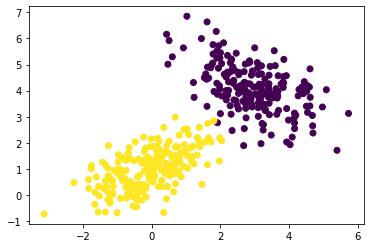

In [144]:
plt.scatter(X[:,0],X[:,1],c=Y) #c=y which differentiates the color based on 0's and 1's in ydata.csv
plt.show()

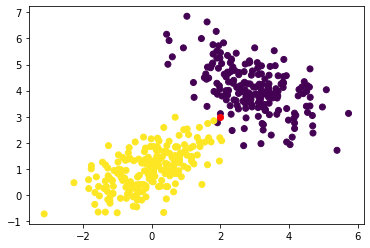

In [145]:
# introducing the our own point in red color to find the KNN of it
query_x = np.array([2,3])
plt.scatter(X[:,0],X[:,1],c=Y)
plt.scatter(query_x[0],query_x[1],color='red')
plt.show()

In [148]:
# function to find the distance between two points
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2)) # sqrt(x1-x2)^2 -> euclidean distance formula

# function of KNN algo. to find the nearest neighbours
def knn(X,Y,queryPoint,k=5): # here we consider k to be '5'
    
    vals=[]
    
    m=X.shape[0]
    
    for i in range(m):
        d=dist(queryPoint,X[i])
        vals.append((d,Y[i])) # storing distance of queryPoint and X points, along with values in Y.
    
    vals = sorted(vals) # sort it according the distance
    vals = vals[:k] # slicing to k values ie., in our first 5 shortest values
    
    vals =  np.array(vals) # converting the vals into the numpy array for manipulation
    
    new_vals=np.unique(vals[:,1],return_counts=True) # getting the count of the 0. and 1. by using the unique function return_count attribute
    print(new_vals)
    
    index = new_vals[1].argmax() # get the index of number which has the max count in second array ie.(3,2) in our case
    pred = new_vals[0][index] # get the values from first array ie., [0.,1.] which has a high count from the second array.
    
    return pred # returning the prediction which side our querypoint belongs to.

In [150]:
knn(X,Y,query_x) # using the previous values we have as X,Y and query_x

(array([0., 1.]), array([3, 2], dtype=int64))


0.0

### We have learned how KNN Algo works! 😍 Let's work on our MNIST Dataset to build our Digit Recognition System.

In [153]:
df = pd.read_csv('train.csv') # image data's in the csv are of pixels format 
df.shape
#42000 - labels and 785- pixels values as columns

(42000, 785)

In [154]:
df.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [160]:
df.index

RangeIndex(start=0, stop=42000, step=1)

In [164]:
df.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [166]:
# Converting the dataframe to numpy array to manipulate
data = df.values
print(data.shape)
print(type(data))

(42000, 785)
<class 'numpy.ndarray'>


In [167]:
X=data[:,1:] # Pixels are stored in X
Y=data[:,0] # labels are stored in Y

print(X.shape,Y.shape)

(42000, 784) (42000,)


In [169]:
# Spliting the data for training and testing as 80% and 20% respectively
split = int(0.8*X.shape[0])
split

33600

In [172]:
X_train = X[:split,:]
Y_train = Y[:split] # first 80% for training 
X_test =  X[split:,:]
Y_test =  Y[split:] # last 20% for testing

print( X_train.shape, Y_train.shape)
print( X_test.shape, Y_test.shape)

(33600, 784) (33600,)
(8400, 784) (8400,)


In [183]:
def drawImg(sample):
    img = sample.reshape((28,28))
    plt.imshow(img, cmap='gray') # cmap='gray' is used to convert img into gray color
    plt.show()

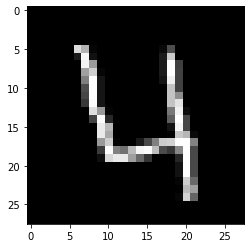

4


In [184]:
drawImg(X_train[3])
print(Y_train[3])

### We have collected and pre-processed the data let's make our prediction's.

In [193]:
# Testing 1 - Passed 
pred = knn(X_train,Y_train,X_test[0])
print(pred)

(array([0.]), array([5], dtype=int64))
0.0


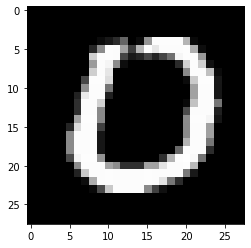

0


In [194]:
drawImg(X_test[0])
print(Y_test[0])

In [195]:
# Testing 2 - Passed 
pred = knn(X_train,Y_train,X_test[7])
print(pred)

(array([7.]), array([5], dtype=int64))
7.0


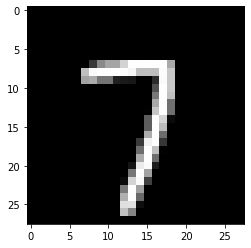

7


In [196]:
drawImg(X_test[7])
print(Y_test[7])

In [197]:
# Testing 3 - Passed 
pred = knn(X_train,Y_train,X_test[9])
print(pred)

(array([3., 5.]), array([1, 4], dtype=int64))
5.0


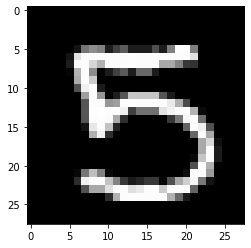

5


In [198]:
drawImg(X_test[9])
print(Y_test[9])

In [199]:
# Testing 4 - Passed 
pred = knn(X_train,Y_train,X_test[17])
print(pred)

(array([3.]), array([5], dtype=int64))
3.0


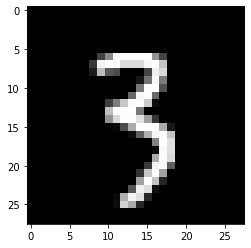

3


In [200]:
drawImg(X_test[17])
print(Y_test[17])

### Yeah! 🎉 We have build the Digit Recognition System Successfully!